In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('HR_capstone_dataset.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.duplicated().sum()

3008

In [7]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.rename(columns={'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident',
                        'Department':'department'})
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [11]:
# df.to_csv("data_HR.csv")

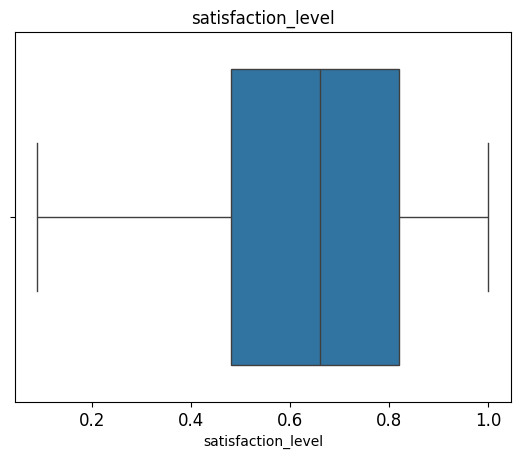

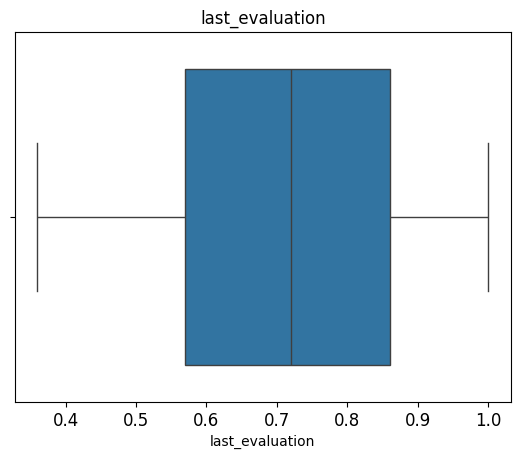

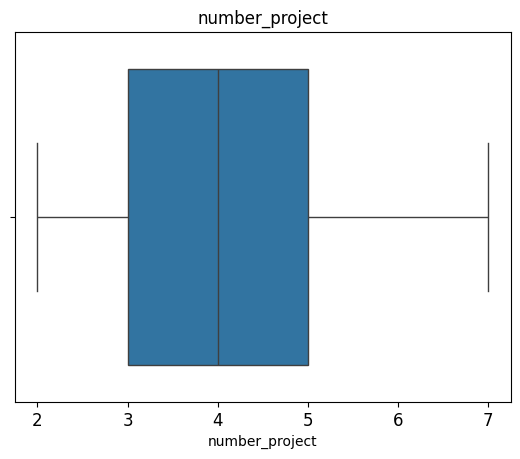

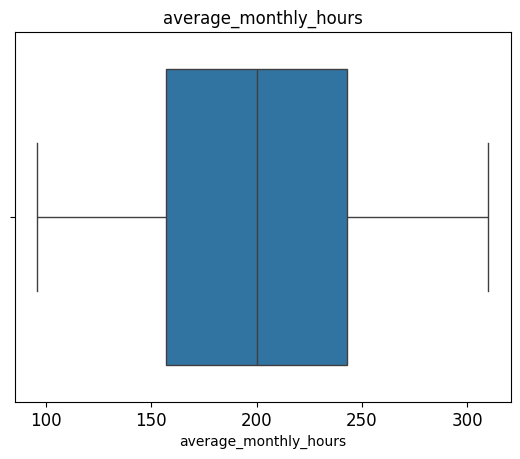

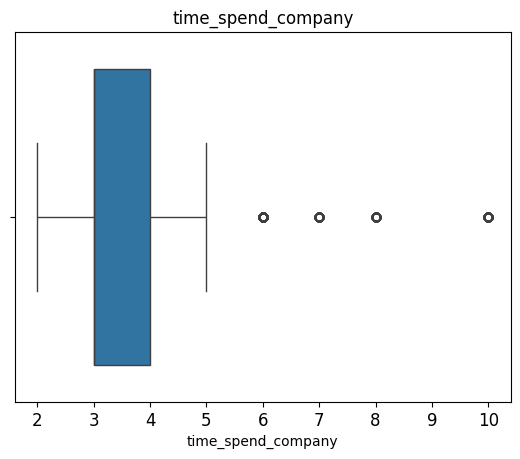

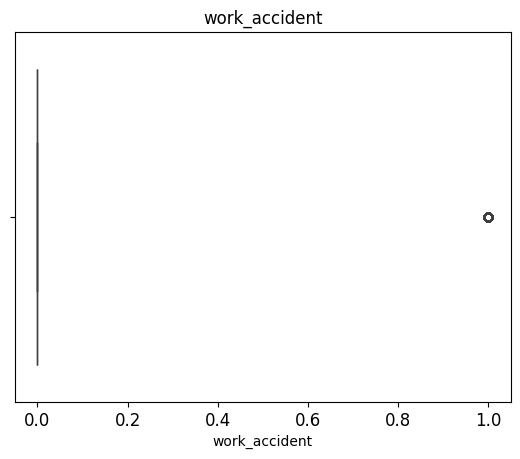

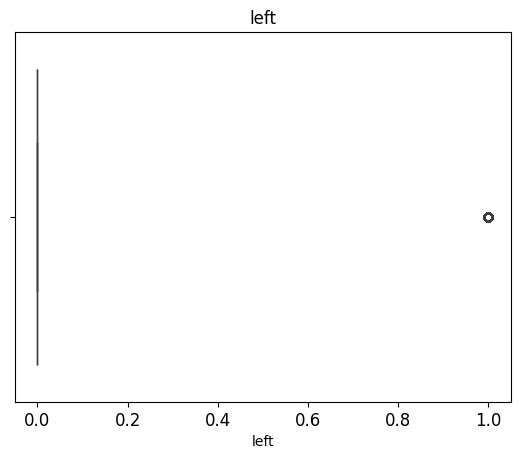

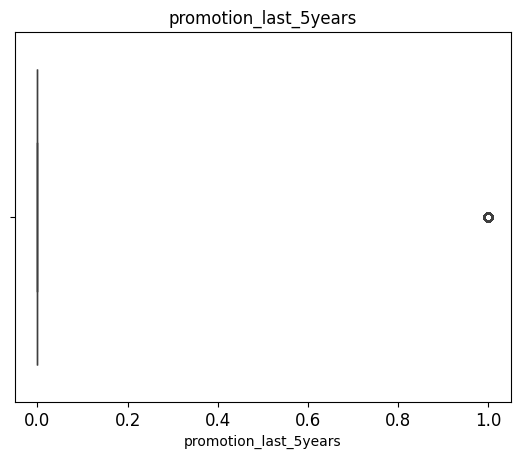

In [12]:
numeric_df = df.select_dtypes(include='number')

for i in numeric_df:
    plt.title(f"{i}")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.boxplot(x=numeric_df[i])
    plt.show()


In [13]:
# sns.pairplot(df)  

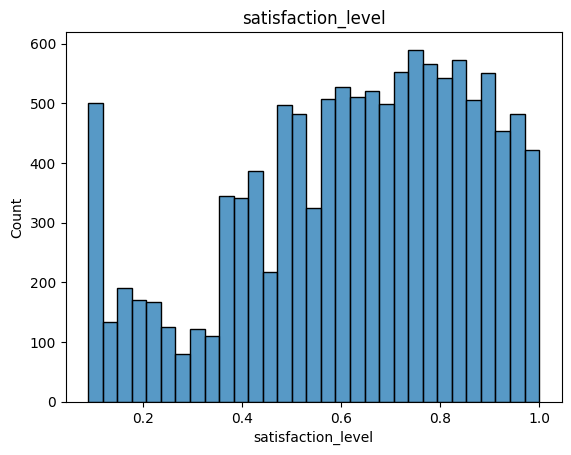

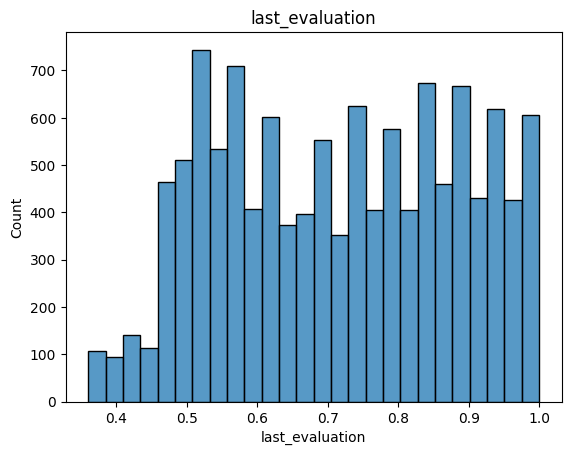

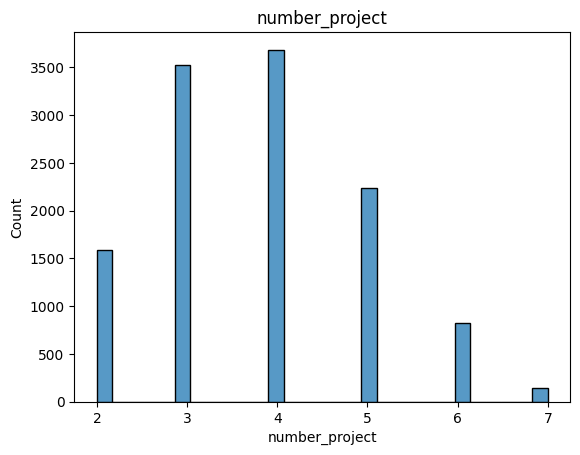

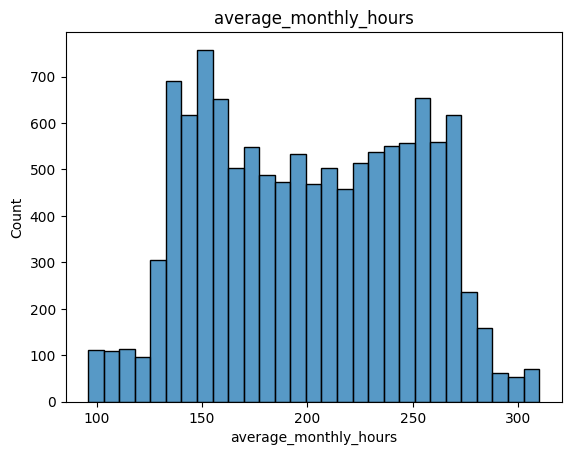

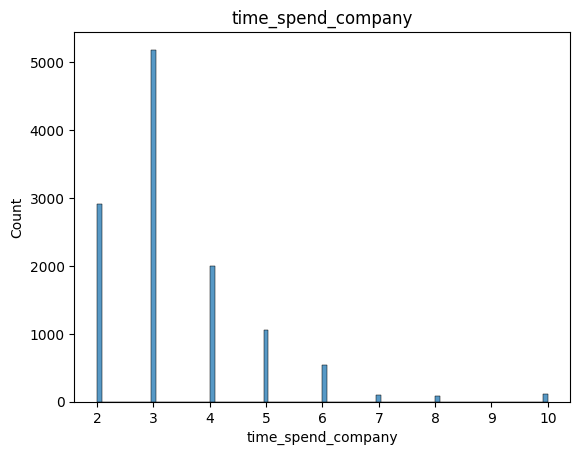

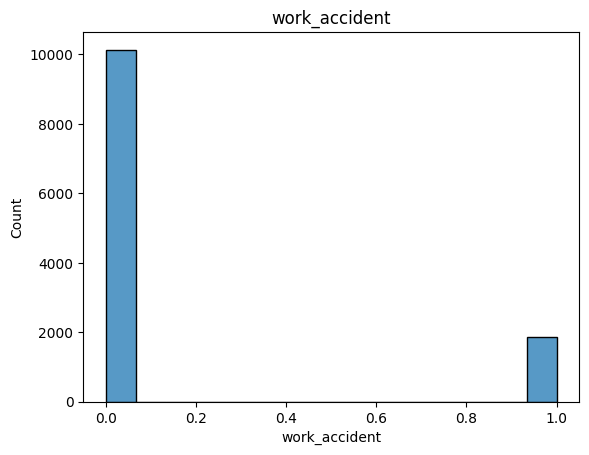

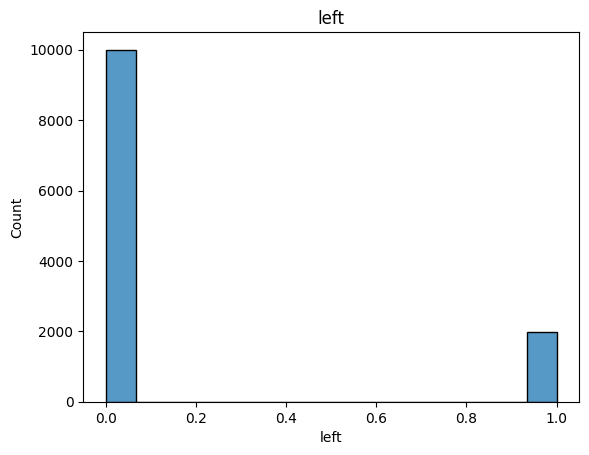

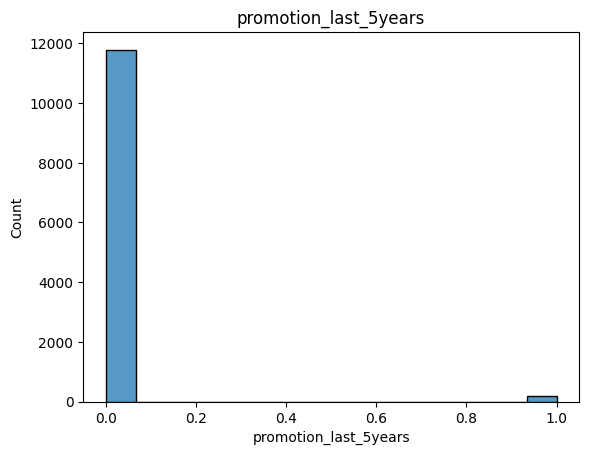

In [14]:
for i in numeric_df : 
    plt.title(F"{i}")
    sns.histplot(x=numeric_df[i])
    plt.show()

In [15]:
test = df['left'].value_counts().reset_index()
test

,left,count
0,0,10000
1,1,1991


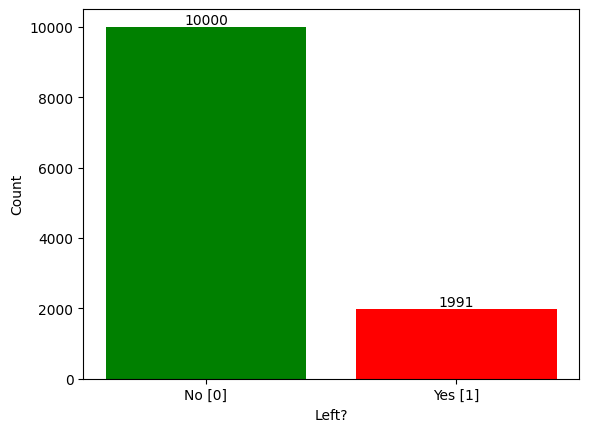

In [16]:
bars = plt.bar(x=test['left'], height=test['count'], color=['green','red'])
plt.xticks(ticks=test['left'],labels=['No [0]','Yes [1]'],rotation=0)
plt.xlabel('Left?')
plt.ylabel('Count')
plt.bar_label(bars)

plt.show()

In [17]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


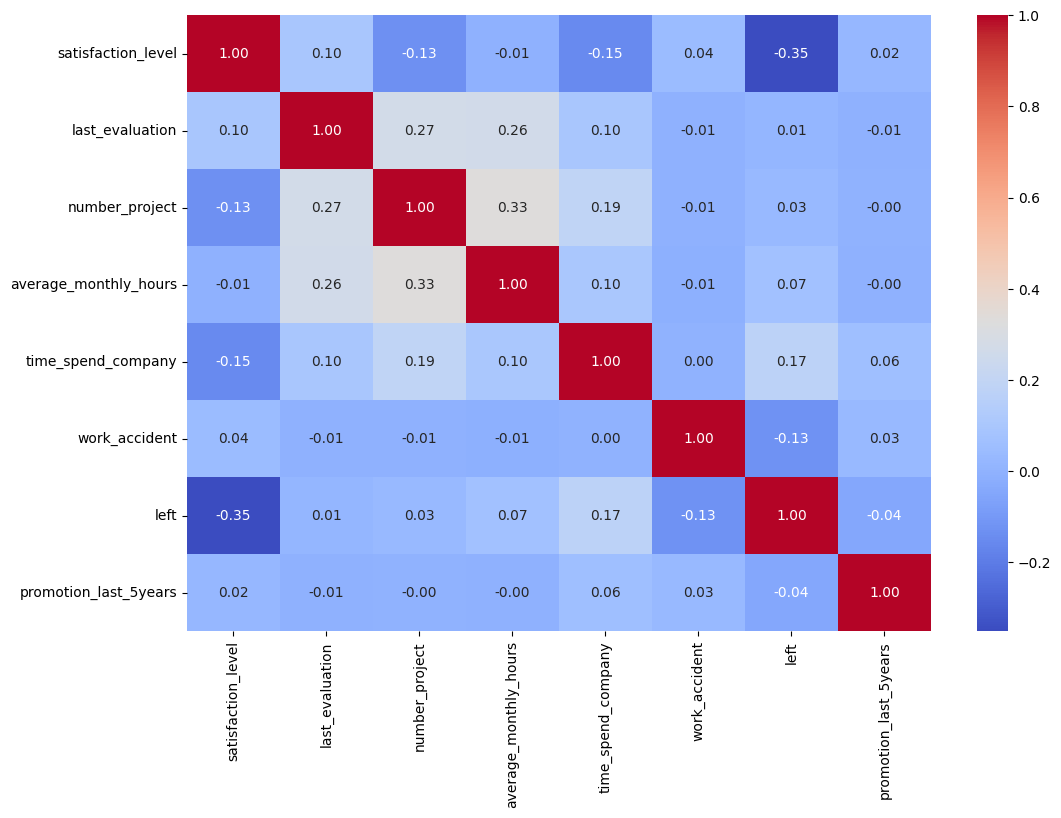

In [18]:
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [19]:
df.groupby(['department','left'])['left'].count()

department   left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: left, dtype: int64

In [20]:
df.groupby(['salary','left'])['left'].count()

salary  left
high    0        942
        1         48
low     0       4566
        1       1174
medium  0       4492
        1        769
Name: left, dtype: int64

In [21]:
df.groupby(['promotion_last_5years','left'])['left'].count()

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: left, dtype: int64

In [22]:
df.groupby(['number_project','left'])['left'].count()

number_project  left
2               0        725
                1        857
3               0       3482
                1         38
4               0       3448
                1        237
5               0       1890
                1        343
6               0        455
                1        371
7               1        145
Name: left, dtype: int64

In [23]:
df.groupby(['number_project','left'])['left'].count()

number_project  left
2               0        725
                1        857
3               0       3482
                1         38
4               0       3448
                1        237
5               0       1890
                1        343
6               0        455
                1        371
7               1        145
Name: left, dtype: int64

In [24]:
df.groupby(['time_spend_company','left'])['left'].count()

time_spend_company  left
2                   0       2879
                    1         31
3                   0       4316
                    1        874
4                   0       1510
                    1        495
5                   0        580
                    1        482
6                   0        433
                    1        109
7                   0         94
8                   0         81
10                  0        107
Name: left, dtype: int64

In [25]:
df.groupby(['work_accident','left'])['left'].count()

work_accident  left
0              0       8255
               1       1886
1              0       1745
               1        105
Name: left, dtype: int64

In [26]:
percentile25 = df['time_spend_company'].quantile(0.25)
percentile75 = df['time_spend_company'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper Limit:", upper_limit)
print("Lower_Limit:", lower_limit)

df = df[(df['time_spend_company'] <= upper_limit) & (df['time_spend_company'] >= lower_limit)] 
df

Upper Limit: 5.5
Lower_Limit: 1.5


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,sales,medium
11986,0.48,0.50,5,142,4,0,0,0,IT,medium
11987,0.19,0.79,4,229,4,0,0,0,product_mng,medium
11992,0.62,0.85,3,237,3,1,0,0,IT,medium


In [27]:
df['salary'] = df['salary'].replace({'low':0,'medium':1,'high':2})
df = pd.get_dummies(df, drop_first=True, dtype=int)
df

C:\Users\zakyf\AppData\Local\Temp\ipykernel_16456\1079968585.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['salary'] = df['salary'].replace({'low':0,'medium':1,'high':2})
C:\Users\zakyf\AppData\Local\Temp\ipykernel_16456\1079968585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].replace({'low':0,'medium':1,'high':2})


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,0,0,0,0,0,0,0,0,0


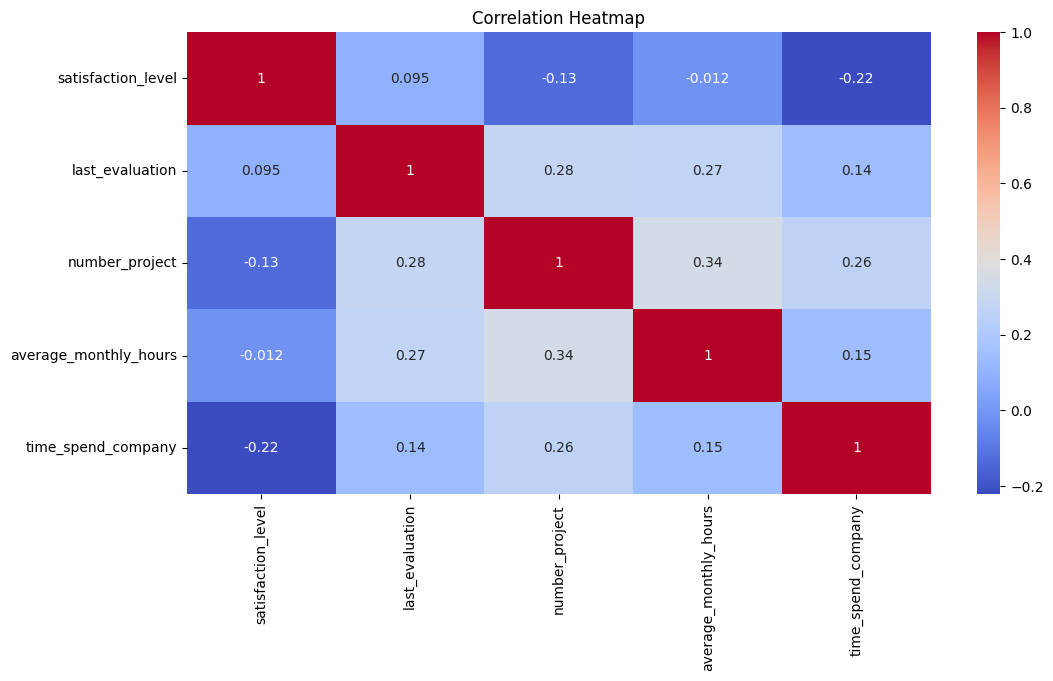

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['satisfaction_level', 'last_evaluation','number_project','average_monthly_hours','time_spend_company']]
           .corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression

In [29]:
X = df.drop(columns=['left'], axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state = 40)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train, random_state = 20)

In [30]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [31]:
y_pred_valid = log_clf.predict(X_valid)

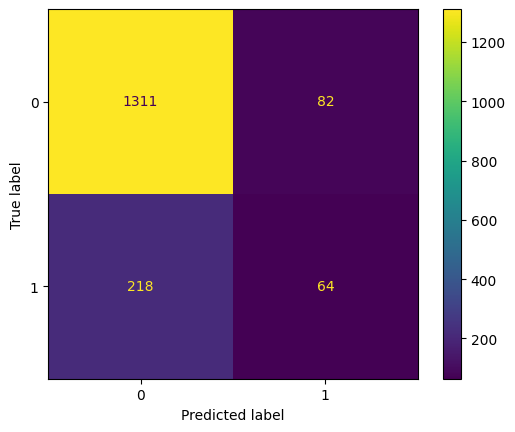

In [32]:
model_cm = confusion_matrix(y_valid, y_pred_valid, labels=log_clf.classes_)
model_disp = ConfusionMatrixDisplay(confusion_matrix=model_cm,display_labels=log_clf.classes_)
model_disp.plot(values_format='')
plt.show()

In [33]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1393
           1       0.44      0.23      0.30       282

    accuracy                           0.82      1675
   macro avg       0.65      0.58      0.60      1675
weighted avg       0.79      0.82      0.80      1675



In [34]:
y_pred = log_clf.predict(X_test)

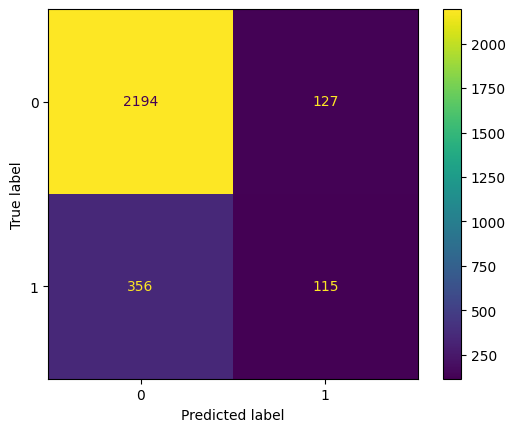

In [36]:
model_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
model_disp = ConfusionMatrixDisplay(confusion_matrix=model_cm,display_labels=log_clf.classes_)
model_disp.plot(values_format='')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2321
           1       0.48      0.24      0.32       471

    accuracy                           0.83      2792
   macro avg       0.67      0.59      0.61      2792
weighted avg       0.80      0.83      0.80      2792



# Modeling Approach B : Tree-based Model

# Decision Tree

In [37]:
y = df['left']
X = df.drop(columns=['left'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  stratify=y, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2 , random_state=2)

In [38]:
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameter 
cv_params = {'max_depth':[4,6,8, None],
            'min_samples_leaf':[2,5,1],
            'min_samples_split':[2,4,6]
            }

scoring = {'accuracy':'accuracy', 'precision':'precision','recall':'recall','f1':'f1','roc_auc':'roc_auc'}

tree_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc') 


In [39]:
%%time
tree_cv.fit(X_train, y_train)

CPU times: total: 4.23 s
Wall time: 4.27 s


,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [40]:
tree_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [41]:
tree_cv.best_score_

0.9669452544836336

In [42]:
y_valid_pred = tree_cv.predict(X_valid)

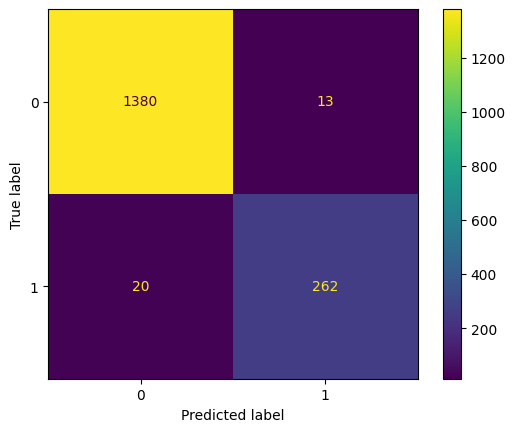

In [96]:
conf = confusion_matrix(y_valid, y_pred_valid, labels = tree_cv.classes_)
confusion = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = tree_cv.classes_)
confusion.plot(values_format="")
plt.show()

In [43]:
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1393
           1       1.00      0.89      0.94       282

    accuracy                           0.98      1675
   macro avg       0.99      0.95      0.97      1675
weighted avg       0.98      0.98      0.98      1675



In [44]:
y_pred = tree_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.98      0.93      0.95       471

    accuracy                           0.98      2792
   macro avg       0.98      0.96      0.97      2792
weighted avg       0.98      0.98      0.98      2792



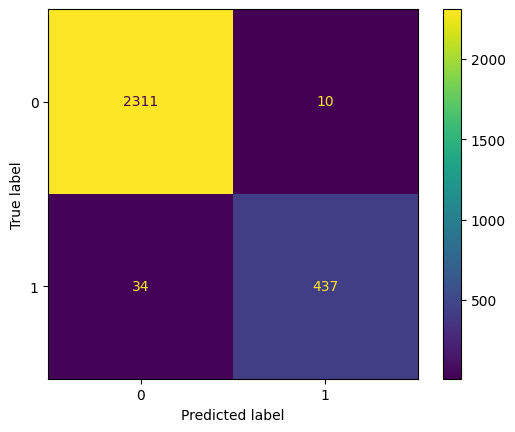

In [45]:
conf = confusion_matrix(y_test, y_pred, labels = tree_cv.classes_)
confusion = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = tree_cv.classes_)
confusion.plot(values_format="")
plt.show()

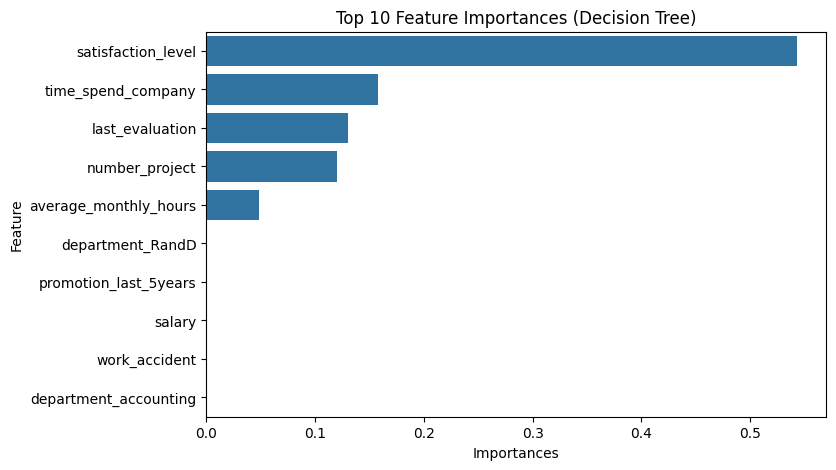

In [100]:
best_dt = tree_cv.best_estimator_
feature = X_train.columns
importance = best_dt.feature_importances_

importance_df = pd.DataFrame({'Feature': feature,
                             'Importances' : importance}).sort_values(by='Importances', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importances', y='Feature')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.show()

# random forest classifier

In [48]:
X = df.drop(columns=['left'])
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state = 3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.2, random_state = 4)

In [49]:
rfc = RandomForestClassifier(random_state = 1)
cv_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


scoring = {'accuracy':'accuracy', 'precision':'precision','recall':'recall','f1':'f1','roc_auc':'roc_auc'}
rfc_cv = GridSearchCV(rfc, cv_params, scoring=scoring,cv=5,refit='roc_auc')

In [50]:
%%time
rfc_cv.fit(X_train, y_train)

CPU times: total: 7min 56s
Wall time: 7min 58s


,estimator,RandomForestC...andom_state=1)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [51]:
rfc_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [52]:
rfc_cv.best_score_

0.9818197812050824

In [53]:
y_valid_pred = rfc_cv.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1393
           1       0.96      0.89      0.92       282

    accuracy                           0.97      1675
   macro avg       0.97      0.94      0.95      1675
weighted avg       0.97      0.97      0.97      1675



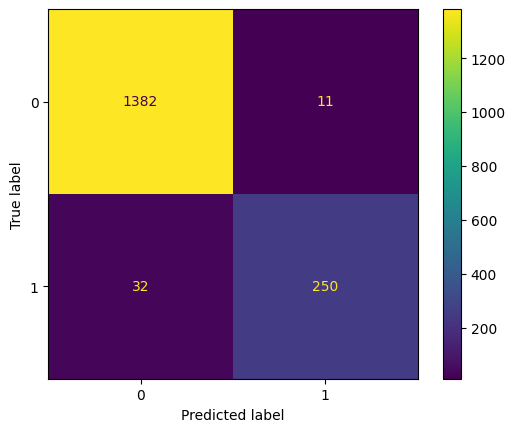

In [54]:
conf = confusion_matrix(y_valid, y_valid_pred, labels=rfc_cv.classes_)
confusion = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels = rfc_cv.classes_)
confusion.plot(values_format='')
plt.show()

In [55]:
y_pred = rfc_cv.predict(X_test)

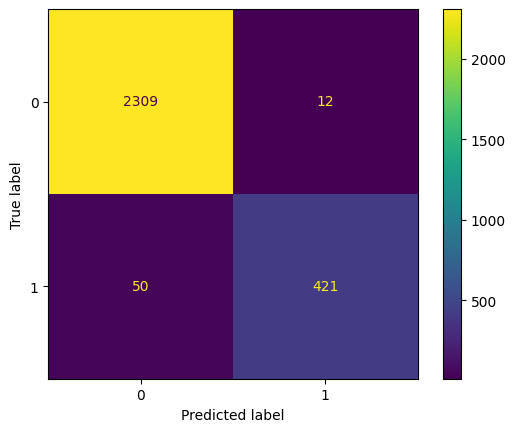

In [56]:
conf = confusion_matrix(y_test, y_pred, labels=rfc_cv.classes_)
confusion = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels = rfc_cv.classes_)
confusion.plot(values_format='')
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2321
           1       0.97      0.89      0.93       471

    accuracy                           0.98      2792
   macro avg       0.98      0.94      0.96      2792
weighted avg       0.98      0.98      0.98      2792



C:\Users\zakyf\AppData\Local\Temp\ipykernel_16456\1150509835.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


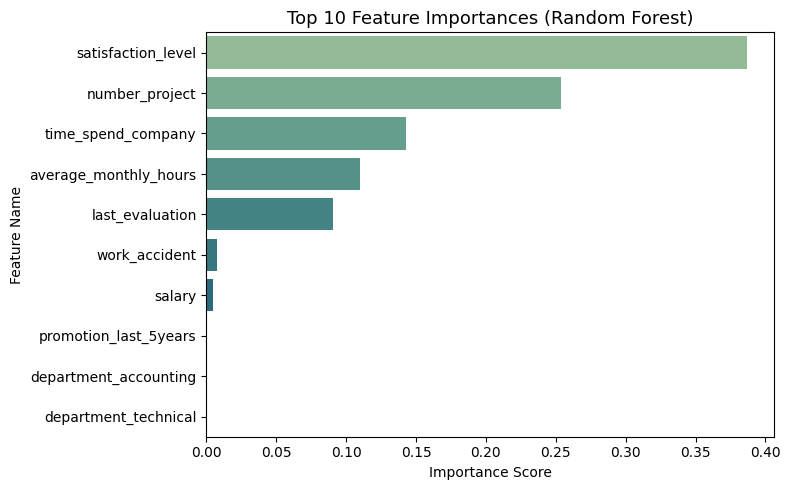

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

best_rfc = rfc_cv.best_estimator_

feature_names = X_train.columns
importances = best_rfc.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette='crest'
)
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=13)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


# XGB classifier

In [59]:
X = df.drop(columns=['left'])
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = 5)
X_train, X_valid, y_train,y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state = 6)

In [60]:
xgb = XGBClassifier(random_state=0)

cv_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall','f1':'f1','roc_auc':'roc_auc'}

xgb_cv = GridSearchCV(xgb, cv_params,scoring=scoring, cv=5, refit='roc_auc')


In [61]:
%%time
xgb_cv.fit(X_train, y_train)

C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    raise ValueError(
ValueError: XGBClassifier should either be a classifier to be used with response_method=predict_proba or the response_method should be 'predict'. Got a regressor with response_method=predict_proba instead.

  warnings.warn(

CPU times: total: 3min 48s
Wall time: 18.8 s


C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\zakyf\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    raise ValueError(
ValueError: XGBClassifier should either be a classifier to be used with response_method=predict_proba or the response_method should be 'predict'. Got a regressor with response_method=predict_proba instead.

  warnings.warn(

,estimator,"XGBClassifier..._state=0, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 6, ...], 'n_estimators': [100, 200]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [62]:
xgb_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [63]:
y_pred_valid = xgb_cv.predict(X_valid)

In [64]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1393
           1       0.95      0.93      0.94       282

    accuracy                           0.98      1675
   macro avg       0.97      0.96      0.96      1675
weighted avg       0.98      0.98      0.98      1675



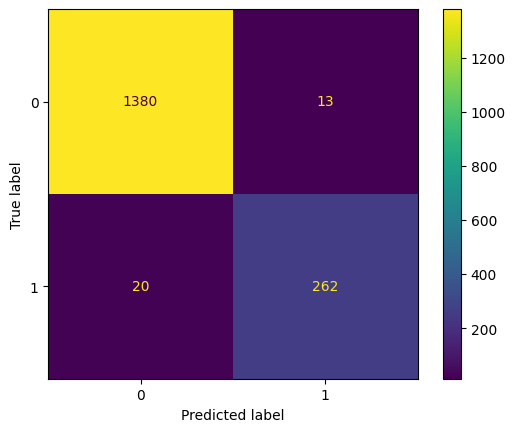

In [65]:
conf = confusion_matrix(y_valid, y_pred_valid, labels=xgb_cv.classes_)
confusion = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=xgb_cv.classes_)
confusion.plot(values_format='')
plt.show()

In [66]:
y_pred = xgb_cv.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2321
           1       0.95      0.91      0.93       471

    accuracy                           0.98      2792
   macro avg       0.97      0.95      0.96      2792
weighted avg       0.98      0.98      0.98      2792



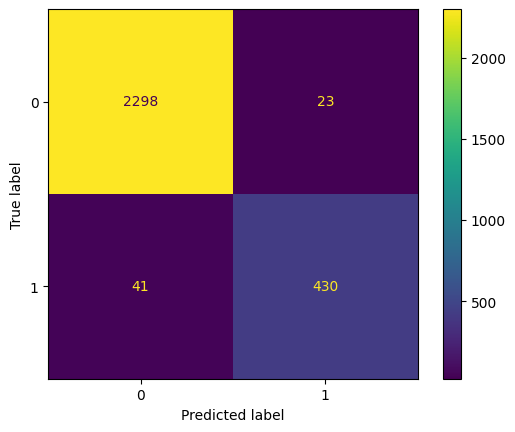

In [68]:
conf = confusion_matrix(y_test, y_pred, labels=xgb_cv.classes_)
confusion = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels=xgb_cv.classes_)
confusion.plot(values_format='')
plt.show()

C:\Users\zakyf\AppData\Local\Temp\ipykernel_16456\219823755.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


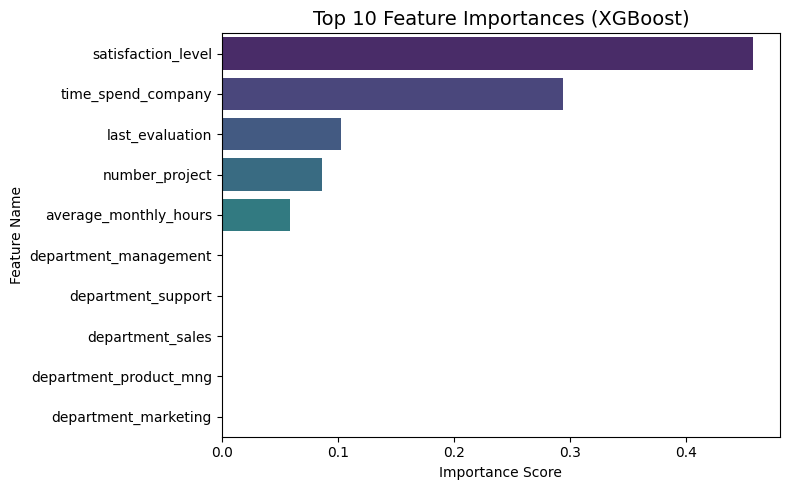

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

best_xgb = xgb_cv.best_estimator_

feature_names = X_train.columns
importances = best_xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df.head(15), 
    x='Importance', 
    y='Feature', 
    palette='viridis'
)
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()